In [1]:
import pathlib
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import networkx as nx
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from ge.walker import RandomWalker

DATA_PATH = pathlib.Path('../dataset/wiki/Wiki_edgelist.txt')
WINDOW_SIZE = 4
WALK_LEN = 10
NUM_WALK = 10
EMBED_DIM = 128
BATCH_SIZE = 10000
EPOCHS = 1


G = nx.read_edgelist(
    DATA_PATH,
    create_using=nx.DiGraph(), 
    nodetype=None, 
    data=[('weight', int)])
print('number of edges: {}'.format(G.number_of_edges()))
print('number of nodes: {}'.format(G.number_of_nodes()))

C:\Users\lisuc\AppData\Roaming\Python\Python37\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
d:\Anaconda\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


number of edges: 16523
number of nodes: 2405


In [2]:
print(type(G['743']))
print(help(nx.classes.coreviews.AtlasView))
# An AtlasView is a Read-only Mapping of Mappings.
# Python3.6以后, 字典是有序的, 这里的有序是指遍历时是按插入的顺序
# 同时每次遍历出来的结果相同

<class 'networkx.classes.coreviews.AtlasView'>
Help on class AtlasView in module networkx.classes.coreviews:

class AtlasView(collections.abc.Mapping)
 |  AtlasView(d)
 |  
 |  An AtlasView is a Read-only Mapping of Mappings.
 |  
 |  It is a View into a dict-of-dict data structure.
 |  The inner level of dict is read-write. But the
 |  outer level is read-only.
 |  
 |  See Also
 |  ========
 |  AdjacencyView - View into dict-of-dict-of-dict
 |  MultiAdjacencyView - View into dict-of-dict-of-dict-of-dict
 |  
 |  Method resolution order:
 |      AtlasView
 |      collections.abc.Mapping
 |      collections.abc.Collection
 |      collections.abc.Sized
 |      collections.abc.Iterable
 |      collections.abc.Container
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, d)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  __len__(self)
 |  
 |  __re

Learning embedding vectors...
Learning embedding vectors done!


d:\Anaconda\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Anaconda\envs\torch\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


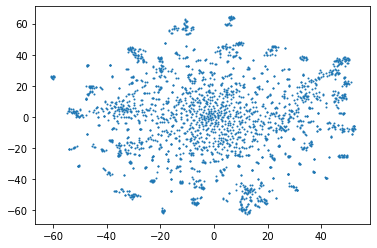

In [3]:
walker = RandomWalker(
    G,
    WALK_LEN,
    NUM_WALK,
    )
walks = walker.gen_walks()

kwargs = dict()
kwargs["sentences"] = walks
kwargs["min_count"] = 0
kwargs["vector_size"] = EMBED_DIM
kwargs["sg"] = 1  # skip gram
kwargs["hs"] = 1  # 层次化软max是关键参数
kwargs["workers"] = 4
kwargs["window"] = WINDOW_SIZE
kwargs["epochs"] = EPOCHS
kwargs["negative"] = 0
#kwargs["min_alpha"] = 0.025

print("Learning embedding vectors...")
model = Word2Vec(**kwargs,)
print("Learning embedding vectors done!")
nes = []
for node in list(G.nodes()):
    nes.append(model.wv[node])
    
tsne = TSNE(n_components=2)
embed_2d = tsne.fit_transform(nes)
plt.scatter(embed_2d[:, 0], embed_2d[:, 1], s=1)
plt.show()
